In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

In [11]:
df = pd.read_excel('/kaggle/input/airfare-tickets/Data.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302


In [12]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# dropping duplicates

In [14]:
print(df.shape)
df.duplicated().sum()


(10683, 11)


220

In [15]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,Null,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,Null,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,Null,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,Null,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,Null,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,Null,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [16]:
df = df.drop_duplicates()
df.shape

(10463, 11)

In [17]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [18]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [19]:
# sns.pairplot(df)
# 

# Handling null values

In [20]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [21]:
df['Total_Stops'].mode()[0]


'1 stop'

In [22]:
print(df['Total_Stops'].unique())

['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


In [24]:
df.loc[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,Null,7480


# From Route column, we can extract source,dest and no. of stops. But we already have them, so dropping it

In [25]:
df.drop('Route',axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,Null,13302


In [26]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [27]:
# df['Route']= df['Route'].fillna(df['Route'].mode()[0])
df['Total_Stops'] = df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [28]:
df.shape

(10463, 10)

# Encoding / feature selection/feature extraction

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Dep_Time         10463 non-null  object
 5   Arrival_Time     10463 non-null  object
 6   Duration         10463 non-null  object
 7   Total_Stops      10463 non-null  object
 8   Additional_Info  10463 non-null  object
 9   Price            10463 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 899.2+ KB


In [30]:
df.shape

(10463, 10)

In [31]:
df.Airline.value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

# dropping rows with Airline = Trujet, Multiple carriers Premium economy, Airways Business, Vistara Premium economy 
# Becausing of less row count vs tot rows

In [32]:
df.loc[df['Airline'].isin( ['Trujet', 'Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy'])]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
426,Vistara Premium economy,03/03/2019,Banglore,New Delhi,16:00,18:35,2h 35m,non-stop,Null,11793
657,Jet Airways Business,01/03/2019,Banglore,New Delhi,05:45,10:45,5h,1 stop,Null,52229
717,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,07:30,19:15,11h 45m,1 stop,Null,10161
1799,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,07:30,21:00,13h 30m,1 stop,Null,9845
2878,Trujet,6/03/2019,Mumbai,Hyderabad,13:05,16:20,3h 15m,1 stop,Null,4140
2924,Jet Airways Business,01/03/2019,Banglore,New Delhi,05:45,11:25,5h 40m,1 stop,Business class,79512
4627,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,08:55,19:15,10h 20m,1 stop,Null,10161
4718,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,06:00,21:00,15h,1 stop,Null,9845
5090,Multiple carriers Premium economy,21/03/2019,Delhi,Cochin,06:00,13:20,7h 20m,1 stop,Null,11269
5372,Jet Airways Business,01/03/2019,Banglore,New Delhi,05:45,12:25,6h 40m,1 stop,Business class,62427


In [33]:
df.drop( index = df.loc[df['Airline'].isin( ['Trujet', 'Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy'])].index, 
        inplace=True)

In [34]:
df.loc[df['Airline'].isin( ['Trujet', 'Multiple carriers Premium economy', 'Jet Airways Business', 'Vistara Premium economy'])]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price


In [35]:
df.shape

(10440, 10)

In [36]:
df.Airline.value_counts()

Airline
Jet Airways          3700
IndiGo               2043
Air India            1695
Multiple carriers    1196
SpiceJet              815
Vistara               478
Air Asia              319
GoAir                 194
Name: count, dtype: int64

In [37]:
df = pd.get_dummies(data = df, columns = ['Airline'])
df.head()

,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Vistara
0,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,False,False,False,True,False,False,False,False
1,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,Null,7662,False,True,False,False,False,False,False,False
2,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,Null,13882,False,False,False,False,True,False,False,False
3,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,Null,6218,False,False,False,True,False,False,False,False
4,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,Null,13302,False,False,False,True,False,False,False,False


In [38]:
df.shape

(10440, 17)

In [39]:
df.drop(['Airline_Vistara'],axis=1, inplace=True)
df.shape

(10440, 16)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date_of_Journey            10440 non-null  object
 1   Source                     10440 non-null  object
 2   Destination                10440 non-null  object
 3   Dep_Time                   10440 non-null  object
 4   Arrival_Time               10440 non-null  object
 5   Duration                   10440 non-null  object
 6   Total_Stops                10440 non-null  object
 7   Additional_Info            10440 non-null  object
 8   Price                      10440 non-null  int64 
 9   Airline_Air Asia           10440 non-null  bool  
 10  Airline_Air India          10440 non-null  bool  
 11  Airline_GoAir              10440 non-null  bool  
 12  Airline_IndiGo             10440 non-null  bool  
 13  Airline_Jet Airways        10440 non-null  bool  
 14  Airline_Mul

In [41]:
df['Source'].value_counts()

Source
Delhi       4331
Kolkata     2860
Banglore    2173
Mumbai       696
Chennai      380
Name: count, dtype: int64

In [42]:
df = pd.get_dummies(data = df, columns = ['Source'])
df.head()

,Date_of_Journey,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,24/03/2019,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,False,False,False,True,False,False,False,True,False,False,False,False
1,1/05/2019,Banglore,05:50,13:15,7h 25m,2 stops,Null,7662,False,True,False,False,False,False,False,False,False,False,True,False
2,9/06/2019,Cochin,09:25,04:25 10 Jun,19h,2 stops,Null,13882,False,False,False,False,True,False,False,False,False,True,False,False
3,12/05/2019,Banglore,18:05,23:30,5h 25m,1 stop,Null,6218,False,False,False,True,False,False,False,False,False,False,True,False
4,01/03/2019,New Delhi,16:50,21:35,4h 45m,1 stop,Null,13302,False,False,False,True,False,False,False,True,False,False,False,False


In [43]:
df.shape

(10440, 20)

In [44]:

df.drop(['Source_Mumbai'],axis=1, inplace=True)
df.shape

(10440, 19)

In [45]:
df.Destination.value_counts()

Destination
Cochin       4331
Banglore     2860
Delhi        1264
New Delhi     909
Hyderabad     696
Kolkata       380
Name: count, dtype: int64

In [46]:
df = pd.get_dummies(data = df, columns = ['Destination'])


In [47]:
df.head(2)

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,1/05/2019,05:50,13:15,7h 25m,2 stops,Null,7662,False,True,False,...,False,False,False,True,True,False,False,False,False,False


In [48]:
df.shape

(10440, 24)

In [49]:

df.drop(['Destination_Kolkata'],axis=1, inplace=True)
df.shape

(10440, 23)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date_of_Journey            10440 non-null  object
 1   Dep_Time                   10440 non-null  object
 2   Arrival_Time               10440 non-null  object
 3   Duration                   10440 non-null  object
 4   Total_Stops                10440 non-null  object
 5   Additional_Info            10440 non-null  object
 6   Price                      10440 non-null  int64 
 7   Airline_Air Asia           10440 non-null  bool  
 8   Airline_Air India          10440 non-null  bool  
 9   Airline_GoAir              10440 non-null  bool  
 10  Airline_IndiGo             10440 non-null  bool  
 11  Airline_Jet Airways        10440 non-null  bool  
 12  Airline_Multiple carriers  10440 non-null  bool  
 13  Airline_SpiceJet           10440 non-null  bool  
 14  Source_Bang

In [51]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5608
non-stop    3472
2 stops     1316
3 stops       43
4 stops        1
Name: count, dtype: int64

In [52]:

df['Total_Stops'].str.slice(0, 1).unique()


array(['n', '2', '1', '3', '4'], dtype=object)

In [53]:
df['Total_Stops'] = np.where(df['Total_Stops'] == 'non-stop', 0, df['Total_Stops'].str.slice(0, 1) )
df['Total_Stops'].unique()

array([0, '2', '1', '3', '4'], dtype=object)

In [54]:
df['Total_Stops'] = df['Total_Stops'].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 0 to 10682
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date_of_Journey            10440 non-null  object
 1   Dep_Time                   10440 non-null  object
 2   Arrival_Time               10440 non-null  object
 3   Duration                   10440 non-null  object
 4   Total_Stops                10440 non-null  int64 
 5   Additional_Info            10440 non-null  object
 6   Price                      10440 non-null  int64 
 7   Airline_Air Asia           10440 non-null  bool  
 8   Airline_Air India          10440 non-null  bool  
 9   Airline_GoAir              10440 non-null  bool  
 10  Airline_IndiGo             10440 non-null  bool  
 11  Airline_Jet Airways        10440 non-null  bool  
 12  Airline_Multiple carriers  10440 non-null  bool  
 13  Airline_SpiceJet           10440 non-null  bool  
 14  Source_Bang

In [56]:
df['Additional_Info'].value_counts()

Additional_Info
Null                            8165
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Null                               1
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

# "Additional_Info" does not contain valuable info, so dropping it

In [57]:
print(df.shape)
df.drop(['Additional_Info'],inplace=True, axis=1)
df.shape

(10440, 23)


(10440, 22)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date_of_Journey            10440 non-null  object
 1   Dep_Time                   10440 non-null  object
 2   Arrival_Time               10440 non-null  object
 3   Duration                   10440 non-null  object
 4   Total_Stops                10440 non-null  int64 
 5   Price                      10440 non-null  int64 
 6   Airline_Air Asia           10440 non-null  bool  
 7   Airline_Air India          10440 non-null  bool  
 8   Airline_GoAir              10440 non-null  bool  
 9   Airline_IndiGo             10440 non-null  bool  
 10  Airline_Jet Airways        10440 non-null  bool  
 11  Airline_Multiple carriers  10440 non-null  bool  
 12  Airline_SpiceJet           10440 non-null  bool  
 13  Source_Banglore            10440 non-null  bool  
 14  Source_Chen

# converting all bool columns into int

In [59]:
df['Source_Banglore'] = df['Source_Banglore'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date_of_Journey            10440 non-null  object
 1   Dep_Time                   10440 non-null  object
 2   Arrival_Time               10440 non-null  object
 3   Duration                   10440 non-null  object
 4   Total_Stops                10440 non-null  int64 
 5   Price                      10440 non-null  int64 
 6   Airline_Air Asia           10440 non-null  bool  
 7   Airline_Air India          10440 non-null  bool  
 8   Airline_GoAir              10440 non-null  bool  
 9   Airline_IndiGo             10440 non-null  bool  
 10  Airline_Jet Airways        10440 non-null  bool  
 11  Airline_Multiple carriers  10440 non-null  bool  
 12  Airline_SpiceJet           10440 non-null  bool  
 13  Source_Banglore            10440 non-null  int64 
 14  Source_Chen

In [60]:

col = df.columns
for i in col:
    if df[i].dtypes=='bool':
        df[i] = df[i].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 0 to 10682
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date_of_Journey            10440 non-null  object
 1   Dep_Time                   10440 non-null  object
 2   Arrival_Time               10440 non-null  object
 3   Duration                   10440 non-null  object
 4   Total_Stops                10440 non-null  int64 
 5   Price                      10440 non-null  int64 
 6   Airline_Air Asia           10440 non-null  int64 
 7   Airline_Air India          10440 non-null  int64 
 8   Airline_GoAir              10440 non-null  int64 
 9   Airline_IndiGo             10440 non-null  int64 
 10  Airline_Jet Airways        10440 non-null  int64 
 11  Airline_Multiple carriers  10440 non-null  int64 
 12  Airline_SpiceJet           10440 non-null  int64 
 13  Source_Banglore            10440 non-null  int64 
 14  Source_Chen

In [61]:
df.dtypes

Date_of_Journey              object
Dep_Time                     object
Arrival_Time                 object
Duration                     object
Total_Stops                   int64
Price                         int64
Airline_Air Asia              int64
Airline_Air India             int64
Airline_GoAir                 int64
Airline_IndiGo                int64
Airline_Jet Airways           int64
Airline_Multiple carriers     int64
Airline_SpiceJet              int64
Source_Banglore               int64
Source_Chennai                int64
Source_Delhi                  int64
Source_Kolkata                int64
Destination_Banglore          int64
Destination_Cochin            int64
Destination_Delhi             int64
Destination_Hyderabad         int64
Destination_New Delhi         int64
dtype: object

# now remaining char columns are all date/ time columns****

In [62]:
col = df.columns
l=[]
for i in col:
    if df[i].dtypes=='object':
        l.append(i)
df.loc[:,l]

,Date_of_Journey,Dep_Time,Arrival_Time,Duration
0,24/03/2019,22:20,01:10 22 Mar,2h 50m
1,1/05/2019,05:50,13:15,7h 25m
2,9/06/2019,09:25,04:25 10 Jun,19h
3,12/05/2019,18:05,23:30,5h 25m
4,01/03/2019,16:50,21:35,4h 45m
...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m
10679,27/04/2019,20:45,23:20,2h 35m
10680,27/04/2019,08:20,11:20,3h
10681,01/03/2019,11:30,14:10,2h 40m


In [63]:
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2,7662,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,13882,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1,6218,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1,13302,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [64]:
# len(df.Arrival_Time)>5
cnt=0
for i in df.Arrival_Time:
#     print(i)
    if len(i) > 5:
        cnt+=1
print(cnt)        

4140


In [65]:
(df['Arrival_Time'].str.len() > 5).sum()

4140

In [66]:
df['Arrival_Time'] = np.where(df['Arrival_Time'].str.len() > 5, df['Arrival_Time'].str.slice(0, 5), df['Arrival_Time'])
(df['Arrival_Time'].str.len() > 5).sum()

0

In [67]:
i = df['Duration'].str.len().idxmax()
i

6

In [68]:
df.loc[df.index==6]

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
6,12/03/2019,18:55,10:25,15h 30m,1,11087,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [69]:
df['Dep_Time'].value_counts()

Dep_Time
18:55    233
17:00    227
07:10    201
07:05    201
10:00    196
        ... 
22:25      1
16:25      1
21:35      1
04:15      1
03:00      1
Name: count, Length: 222, dtype: int64

In [70]:
col = df.columns
l=[]
for i in col:
    if df[i].dtypes=='object':
        l.append(i)
df.loc[:,l]

,Date_of_Journey,Dep_Time,Arrival_Time,Duration
0,24/03/2019,22:20,01:10,2h 50m
1,1/05/2019,05:50,13:15,7h 25m
2,9/06/2019,09:25,04:25,19h
3,12/05/2019,18:05,23:30,5h 25m
4,01/03/2019,16:50,21:35,4h 45m
...,...,...,...,...
10678,9/04/2019,19:55,22:25,2h 30m
10679,27/04/2019,20:45,23:20,2h 35m
10680,27/04/2019,08:20,11:20,3h
10681,01/03/2019,11:30,14:10,2h 40m


In [71]:
df.shape
# df['Date_of_Journey'].value_counts()


(10440, 22)

In [72]:
# Function to convert time string to decimal
def convert_time_to_decimal(time_str):
    hours, minutes = map(int, time_str.split(':'))
    return hours + minutes / 60.0


In [73]:
df['Dep_Time'] = df['Dep_Time'].apply(convert_time_to_decimal)
df['Arrival_Time'] = df['Arrival_Time'].apply(convert_time_to_decimal)


df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,24/03/2019,22.333333,1.166667,2h 50m,0,3897,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1/05/2019,5.833333,13.250000,7h 25m,2,7662,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,9/06/2019,9.416667,4.416667,19h,2,13882,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,12/05/2019,18.083333,23.500000,5h 25m,1,6218,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,01/03/2019,16.833333,21.583333,4h 45m,1,13302,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [74]:
col = df.columns
l=[]
for i in col:
    if df[i].dtypes=='object':
        l.append(i)
df.loc[:,l]

,Date_of_Journey,Duration
0,24/03/2019,2h 50m
1,1/05/2019,7h 25m
2,9/06/2019,19h
3,12/05/2019,5h 25m
4,01/03/2019,4h 45m
...,...,...
10678,9/04/2019,2h 30m
10679,27/04/2019,2h 35m
10680,27/04/2019,3h
10681,01/03/2019,2h 40m


# Duration to float. 

In [75]:

import re

def time_to_decimal(time_str):
    # Use regular expressions to find hours and minutes
    hours_match = re.search(r'(\d+)h', time_str)
    minutes_match = re.search(r'(\d+)m', time_str)

    # Convert found hours and minutes to integers, if not found use 0 as default
    hours = int(hours_match.group(1)) if hours_match else 0
    minutes = int(minutes_match.group(1)) if minutes_match else 0

    # Calculate the decimal time
    return hours + minutes / 60.0

In [76]:
df['Duration'] = df['Duration'].apply(time_to_decimal)

df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,...,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,24/03/2019,22.333333,1.166667,2.833333,0,3897,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,1/05/2019,5.833333,13.250000,7.416667,2,7662,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
2,9/06/2019,9.416667,4.416667,19.000000,2,13882,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,12/05/2019,18.083333,23.500000,5.416667,1,6218,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,01/03/2019,16.833333,21.583333,4.750000,1,13302,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


In [77]:
print(df.shape)
df.drop(['Date_of_Journey'],axis=1,inplace=True)
df.shape

(10440, 22)


(10440, 21)

In [78]:
df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,22.333333,1.166667,2.833333,0,3897,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,5.833333,13.250000,7.416667,2,7662,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,9.416667,4.416667,19.000000,2,13882,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,18.083333,23.500000,5.416667,1,6218,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,16.833333,21.583333,4.750000,1,13302,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


# Outliers

<Axes: >

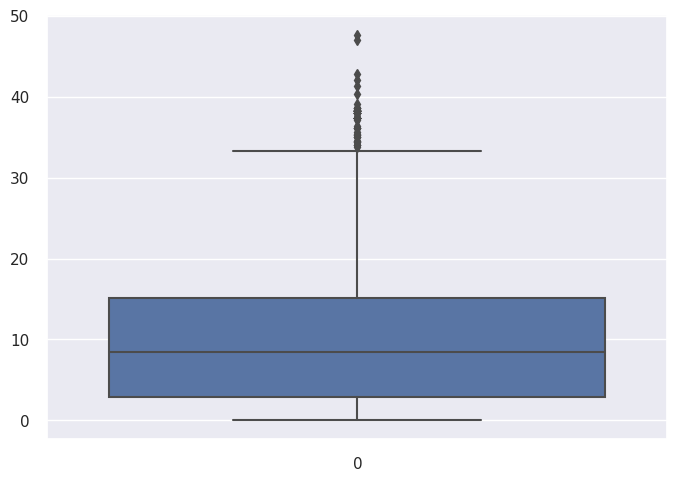

In [79]:
sns.boxplot(df['Duration'])

In [80]:
q3 = df['Duration'].quantile(0.75)
q1 = df['Duration'].quantile(0.25)
print(q1,q3)
iqr = q3-q1
print(iqr)
lower = q1-((1.5)*iqr)
upper = q3+((1.5)*iqr)
print(lower,upper)

2.8333333333333335 15.166666666666666
12.333333333333332
-15.666666666666666 33.666666666666664


In [81]:
print(df['Duration'].max(),df['Duration'].min())
print(df['Duration'].mean())

47.666666666666664 0.08333333333333333
10.503408365261814


In [82]:
df['Duration'][df['Duration']>upper].count()

75

In [83]:
df['Duration'] = np.where(df['Duration']>upper, upper, df['Duration'])
df['Duration'][df['Duration']>upper].count()

0

<Axes: >

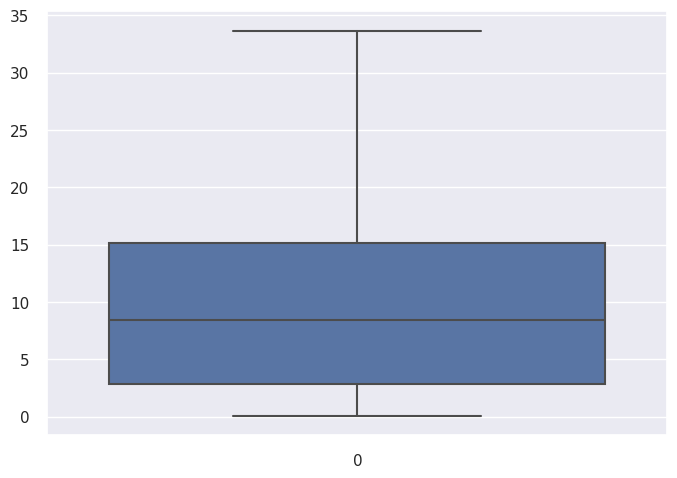

In [84]:
sns.boxplot(df['Duration'])

In [85]:
df.head(3)

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,22.333333,1.166667,2.833333,0,3897,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,5.833333,13.250000,7.416667,2,7662,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,9.416667,4.416667,19.000000,2,13882,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0


In [86]:
df.shape

(10440, 21)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10440 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Dep_Time                   10440 non-null  float64
 1   Arrival_Time               10440 non-null  float64
 2   Duration                   10440 non-null  float64
 3   Total_Stops                10440 non-null  int64  
 4   Price                      10440 non-null  int64  
 5   Airline_Air Asia           10440 non-null  int64  
 6   Airline_Air India          10440 non-null  int64  
 7   Airline_GoAir              10440 non-null  int64  
 8   Airline_IndiGo             10440 non-null  int64  
 9   Airline_Jet Airways        10440 non-null  int64  
 10  Airline_Multiple carriers  10440 non-null  int64  
 11  Airline_SpiceJet           10440 non-null  int64  
 12  Source_Banglore            10440 non-null  int64  
 13  Source_Chennai             10440 non-null  int64  


In [88]:
df.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,...,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,22.333333,1.166667,2.833333,0,3897,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,5.833333,13.250000,7.416667,2,7662,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,9.416667,4.416667,19.000000,2,13882,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,18.083333,23.500000,5.416667,1,6218,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,16.833333,21.583333,4.750000,1,13302,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


# dividing dataset into dv amd idv

In [89]:
x = df.drop(['Price'], axis=1)
y=df[['Price']]

In [90]:
x.shape

(10440, 20)

# Feature Scaling

In [91]:
from sklearn.preprocessing import Normalizer
nor = Normalizer()
x_fs_nor = nor.fit_transform(x)
normalized_x = pd.DataFrame(x_fs_nor, columns=x.columns)
normalized_x.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,0.987807,0.051602,0.125319,0.000000,0.0,0.000000,0.0,0.044230,0.000000,0.0,0.0,0.044230,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.044230
1,0.353960,0.803995,0.450035,0.121358,0.0,0.060679,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.060679,0.060679,0.000000,0.0,0.0,0.000000
2,0.431530,0.202399,0.870698,0.091652,0.0,0.000000,0.0,0.000000,0.045826,0.0,0.0,0.000000,0.0,0.045826,0.000000,0.000000,0.045826,0.0,0.0,0.000000
3,0.598603,0.777908,0.179305,0.033102,0.0,0.000000,0.0,0.033102,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.033102,0.033102,0.000000,0.0,0.0,0.000000
4,0.604373,0.774914,0.170541,0.035903,0.0,0.000000,0.0,0.035903,0.000000,0.0,0.0,0.035903,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.035903


In [92]:
normalized_x.describe()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
count,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000,10440.000000
mean,0.547340,0.592918,0.412034,0.032310,0.001535,0.006498,0.000965,0.011644,0.015326,0.005156,0.004615,0.011628,0.002126,0.018112,0.011340,0.011340,0.018112,0.007460,0.004637,0.004168
std,0.199177,0.257715,0.251904,0.027144,0.009296,0.015885,0.007270,0.028259,0.023941,0.014533,0.016818,0.026732,0.011532,0.023107,0.019774,0.019774,0.023107,0.023278,0.021074,0.015327
min,0.011696,0.003849,0.003474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.410246,0.386941,0.174568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558030,0.752672,0.392967,0.036931,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.651711,0.794031,0.596151,0.047771,0.000000,0.000000,0.000000,0.000000,0.034462,0.000000,0.000000,0.000000,0.000000,0.039204,0.027586,0.027586,0.039204,0.000000,0.000000,0.000000
max,0.996125,0.815245,0.985355,0.162198,0.102456,0.099150,0.073453,0.242140,0.178766,0.092582,0.107203,0.214354,0.103967,0.108121,0.109100,0.109100,0.108121,0.214354,0.242140,0.209978


# splitting data into train and test

In [95]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
# stratify = model takes both 1 and 0 data

In [96]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming x is your feature set
scaler = StandardScaler()
x_fs_std = scaler.fit_transform(x)
standardized_x = pd.DataFrame(x_fs_std, columns=x.columns)

standardized_x.head()

,Dep_Time,Arrival_Time,Duration,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_New Delhi
0,1.647475,-1.851757,-0.924767,-1.213556,-0.177535,-0.440256,-0.137602,2.027346,-0.740919,-0.359696,-0.29099,1.950492,-0.194354,-0.841994,-0.614255,-0.614255,-0.841994,-0.371148,-0.267261,3.238078
1,-1.231771,-0.080351,-0.370109,1.812725,-0.177535,2.271408,-0.137602,-0.493256,-0.740919,-0.359696,-0.29099,-0.512691,-0.194354,-0.841994,1.627989,1.627989,-0.841994,-0.371148,-0.267261,-0.308825
2,-0.606480,-1.375310,1.031665,1.812725,-0.177535,-0.440256,-0.137602,-0.493256,1.349675,-0.359696,-0.29099,-0.512691,-0.194354,1.187657,-0.614255,-0.614255,1.187657,-0.371148,-0.267261,-0.308825
3,0.905851,1.422290,-0.612142,0.299585,-0.177535,-0.440256,-0.137602,2.027346,-0.740919,-0.359696,-0.29099,-0.512691,-0.194354,-0.841994,1.627989,1.627989,-0.841994,-0.371148,-0.267261,-0.308825
4,0.687726,1.141308,-0.692819,0.299585,-0.177535,-0.440256,-0.137602,2.027346,-0.740919,-0.359696,-0.29099,1.950492,-0.194354,-0.841994,-0.614255,-0.614255,-0.841994,-0.371148,-0.267261,3.238078


In [97]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)
# stratify = model takes both 1 and 0 data

In [98]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, positive=False)

In [99]:
# y_pred_train = linear_model.predict(x_train)
y_pred = linear_model.predict(x_test)


In [100]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

n = len(y_test)  
p = x_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R-squared: {adjusted_r_squared}")

# Print the performance metrics
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Adjusted R-squared: 0.5496838497552972
R-squared (R²): 0.5531358708380469
Mean Absolute Error (MAE): 2047.5294976838566
Mean Squared Error (MSE): 9284205.699500302
Root Mean Squared Error (RMSE): 3046.999458401708


In [101]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='squared_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, monotonic_cst=None,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
y_pred = rf_model.predict(x_test)


In [103]:
r2 = r2_score(y_test, y_pred)
adjusted_r_squared = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the performance metrics
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

R-squared (R²): 0.5611360303871661
Adjusted R-squared: 0.5577458104596817
Mean Absolute Error (MAE): 1762.6549844205238
Mean Squared Error (MSE): 9117991.58197393
Root Mean Squared Error (RMSE): 3019.601228966158


In [104]:
# !pip install pycaret

In [105]:
# from pycaret.classification import *
from pycaret.regression import *


In [106]:
exp_reg1 = setup(data=df, target='Price', session_id=1235)

,Description,Value
0,Session id,1235
1,Target,Price
2,Target type,Regression
3,Original data shape,"(10440, 21)"
4,Transformed data shape,"(10440, 21)"
5,Transformed train set shape,"(7307, 21)"
6,Transformed test set shape,"(3133, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [107]:
# R-squared (R²): 0.5675753077989394
# Adjusted R-squared: 0.5642348312272819
# Mean Absolute Error (MAE): 1759.3721351570105
# Mean Squared Error (MSE): 8984206.898564307
# Root Mean Squared Error (RMSE): 2997.36666068139

SyntaxError: invalid character '²' (U+00B2) (770838492.py, line 1)

In [108]:
print(compare_models())

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,1695.4071,7043937.6065,2643.8635,0.6462,0.2486,0.1914,0.1790
catboost,CatBoost Regressor,1685.8330,7115396.6292,2658.6526,0.6424,0.2477,0.1894,3.2740
gbr,Gradient Boosting Regressor,1824.1444,7471779.1225,2722.7315,0.6248,0.2609,0.2097,0.6990
xgboost,Extreme Gradient Boosting,1686.9406,7684136.8275,2762.8046,0.6137,0.2529,0.1871,0.2900
rf,Random Forest Regressor,1679.7220,7747932.1025,2775.6318,0.6101,0.2552,0.1854,1.5570
knn,K Neighbors Regressor,1744.7073,8042762.8232,2823.7404,0.5966,0.2628,0.1924,0.0820
et,Extra Trees Regressor,1723.0985,8444498.8995,2898.2172,0.5745,0.2621,0.1890,1.1370
lasso,Lasso Regression,1997.1322,8670948.2913,2934.8040,0.5643,0.2905,0.2365,0.0490
lr,Linear Regression,1997.9789,8670637.0770,2934.7678,0.5643,0.2907,0.2366,0.0460
br,Bayesian Ridge,1996.9901,8670784.1284,2934.7743,0.5643,0.2905,0.2365,0.0630


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=1235, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)
